1. Import library and prepare webcam

In [1]:
import cv2 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import time 
import mediapipe as mp

In [2]:
import torch

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils                  

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7,min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        draw_styled_landmarks(image,results)
        cv2.imshow('My WebCam',image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [12]:
len(results.right_hand_landmarks.landmark)

21

In [13]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [14]:
draw_landmarks(image,results)

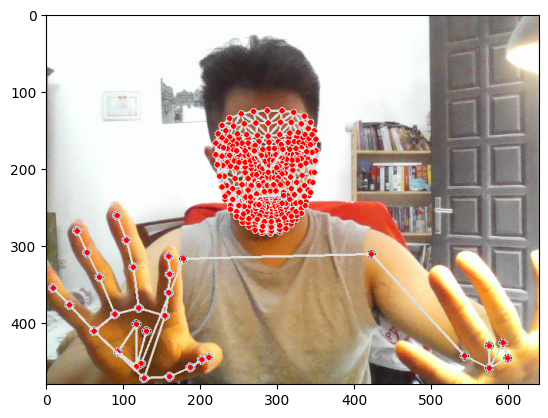

In [15]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

2.Extract Keypoint Value

In [16]:
len(results.right_hand_landmarks.landmark)

21

In [17]:
results.face_landmarks

landmark {
  x: 0.456430376
  y: 0.499824077
  z: -0.0229509585
}
landmark {
  x: 0.455357283
  y: 0.455662191
  z: -0.0464920178
}
landmark {
  x: 0.454983234
  y: 0.467798173
  z: -0.0229183529
}
landmark {
  x: 0.446142107
  y: 0.411643416
  z: -0.0374728926
}
landmark {
  x: 0.455133766
  y: 0.442377687
  z: -0.0500995927
}
landmark {
  x: 0.454491645
  y: 0.424438447
  z: -0.0474838
}
landmark {
  x: 0.452539861
  y: 0.379817903
  z: -0.0266413856
}
landmark {
  x: 0.387491792
  y: 0.377132475
  z: 0.00460127275
}
landmark {
  x: 0.45165205
  y: 0.347508729
  z: -0.0234907102
}
landmark {
  x: 0.451454103
  y: 0.329507381
  z: -0.0267144572
}
landmark {
  x: 0.44953528
  y: 0.26162
  z: -0.0211851243
}
landmark {
  x: 0.456602544
  y: 0.506636381
  z: -0.0214280821
}
landmark {
  x: 0.456620246
  y: 0.511811197
  z: -0.0180156622
}
landmark {
  x: 0.456508756
  y: 0.513872147
  z: -0.0136468047
}
landmark {
  x: 0.456724584
  y: 0.520867467
  z: -0.0106505966
}
landmark {
  x: 0.4

In [18]:
results.left_hand_landmarks

In [19]:
results.pose_landmarks

landmark {
  x: 0.450723261
  y: 0.428953946
  z: -0.629762948
  visibility: 0.999998093
}
landmark {
  x: 0.480692446
  y: 0.366663724
  z: -0.607860208
  visibility: 0.999997139
}
landmark {
  x: 0.494550049
  y: 0.364673674
  z: -0.607709706
  visibility: 0.999996603
}
landmark {
  x: 0.506352246
  y: 0.363461792
  z: -0.607437193
  visibility: 0.999996424
}
landmark {
  x: 0.423144579
  y: 0.370580852
  z: -0.594626069
  visibility: 0.999997318
}
landmark {
  x: 0.403690875
  y: 0.370282382
  z: -0.594049752
  visibility: 0.999996543
}
landmark {
  x: 0.387449175
  y: 0.370180726
  z: -0.593978822
  visibility: 0.999996364
}
landmark {
  x: 0.528539717
  y: 0.371706396
  z: -0.330572814
  visibility: 0.999997318
}
landmark {
  x: 0.373285025
  y: 0.382480741
  z: -0.258258432
  visibility: 0.999996722
}
landmark {
  x: 0.481959164
  y: 0.489883572
  z: -0.518606544
  visibility: 0.999997377
}
landmark {
  x: 0.415189087
  y: 0.495180517
  z: -0.497654587
  visibility: 0.999997
}
la

In [20]:
results.right_hand_landmarks 

landmark {
  x: 0.199416384
  y: 0.984567165
  z: 6.31847911e-007
}
landmark {
  x: 0.25090909
  y: 0.980712891
  z: -0.0532049537
}
landmark {
  x: 0.292828053
  y: 0.955067217
  z: -0.0921778083
}
landmark {
  x: 0.316538393
  y: 0.933819711
  z: -0.125190958
}
landmark {
  x: 0.330747515
  y: 0.929096043
  z: -0.159748182
}
landmark {
  x: 0.242098033
  y: 0.814997494
  z: -0.0881528184
}
landmark {
  x: 0.249774486
  y: 0.752605557
  z: -0.129852295
}
landmark {
  x: 0.251109809
  y: 0.703561425
  z: -0.159173638
}
landmark {
  x: 0.248633474
  y: 0.655639052
  z: -0.180098444
}
landmark {
  x: 0.18789877
  y: 0.795419335
  z: -0.0891213194
}
landmark {
  x: 0.177790821
  y: 0.684081614
  z: -0.125011981
}
landmark {
  x: 0.162806094
  y: 0.611526608
  z: -0.148764089
}
landmark {
  x: 0.144822702
  y: 0.544397831
  z: -0.166785806
}
landmark {
  x: 0.139436156
  y: 0.812236488
  z: -0.0931315348
}
landmark {
  x: 0.108967729
  y: 0.710460901
  z: -0.129008129
}
landmark {
  x: 0.0

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) 
    left_hand = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand]) 

In [24]:
result_test = extract_keypoints(results)

In [22]:
for i in range(10):
    print(result_test[i])

0.4489423632621765
0.43829014897346497
-0.8902475237846375
0.9999876022338867
0.4786459803581238
0.3752789795398712
-0.849198043346405
0.9999836683273315
0.4985109269618988
0.3741458058357239


In [25]:
len(result_test)

1662

In [24]:
np.save('0',result_test)

In [59]:
np.load('0.npy')

array([ 0.51617628,  0.41920656, -1.27618527, ...,  0.        ,
        0.        ,  0.        ])

3. Set up folders for collection

In [27]:
DATA_PATH = os.path.join('F:\TTCS\MP_Data')
actions = np.array(['hello','thanks','iloveyou','i','you','yesterday','yes','no','help','goodbye'])
no_sequences = 30
sequence_length = 30

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20404\1893779169.py:1: SyntaxWarning: invalid escape sequence '\T'
  DATA_PATH = os.path.join('F:\TTCS\MP_Data')


In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass 

4. Collect keypoint values for training and testing


In [84]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                print(results)
#           

                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [29]:
import os 
from tqdm import tqdm 

In [21]:
def normalize_keypoint_block(block,dim = 3):
    if np.all(block == 0):
        return block.flatten()

    block = block.reshape(-1,dim)
    mean = np.mean(block,axis = 0)
    std = np.std(block,axis = 0) + 1e-6
    normed = (block - mean)/std 
    return normed.flatten()

def normalize_keypoints(keypoints):
    pose = keypoints[:132].reshape(33,4)
    face = keypoints[132:1536].reshape(468,3)
    left = keypoints[1536:1599].reshape(21,3)
    right = keypoints[1599:1662].reshape(21,3)

    pose_norm = normalize_keypoint_block(pose,dim = 4)
    face_norm = normalize_keypoint_block(face,dim = 3)
    left_norm = normalize_keypoint_block(left,dim = 3)
    right_norm = normalize_keypoint_block(right,dim = 3)

    return np.concatenate([pose_norm,face_norm,left_norm,right_norm])

In [33]:

def process_dataset(data_path):
    actions = os.listdir(data_path)
    for action in tqdm(actions, desc = "Actions"):
        action_path = os.path.join(data_path,action)
        for sequence in os.listdir(action_path):
            sequence_path = os.path.join(action_path,sequence)
            for frame_file in os.listdir(sequence_path):
                frame_path = os.path.join(sequence_path,frame_file)
                keypoints = np.load(frame_path)
                normed = normalize_keypoints(keypoints)
                np.save(frame_path,normed)


DATA_PATH = 'F:/TTCS/MP_Data'
process_dataset(DATA_PATH)

Actions: 100%|██████████| 10/10 [02:05<00:00, 12.55s/it]


5. Preprocess data and create labels and features

In [34]:
from sklearn.model_selection import train_test_split 
import torch 

In [212]:
label_map = {label:num for num,label in enumerate(actions)}

In [213]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'i': 3,
 'you': 4,
 'yesterday': 5,
 'yes': 6,
 'no': 7,
 'help': 8,
 'goodbye': 9}

In [11]:
selected_actions = ['hello','thanks','iloveyou','i','you','yesterday','yes','no','help','goodbye']

In [36]:
def load_filtered_dataset(root_dir,allowed_actions):
    X,y = [],[]
    my_label_map = {action: idx for idx, action in enumerate(allowed_actions)}
    for action in allowed_actions:
        class_dir = os.path.join(root_dir,action)
        for sequence in os.listdir(class_dir):
            seq_path = os.path.join(class_dir,sequence)
            window = []
            for frame_file in sorted(os.listdir(seq_path)):
                frame = np.load(os.path.join(seq_path,frame_file))
                window.append(frame)
            X.append(window)
            y.append(my_label_map[action])
    return np.array(X), np.array(y), my_label_map

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [37]:
X,y,my_label_map = load_filtered_dataset('F:\TTCS\MP_Data',selected_actions)

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20404\4000523080.py:1: SyntaxWarning: invalid escape sequence '\T'
  X,y,my_label_map = load_filtered_dataset('F:\TTCS\MP_Data',selected_actions)


In [38]:
import torch.nn.functional as F 

In [43]:
tmp = np.load('F:/TTCS/MP_Data/goodbye/0/0.npy')
print(tmp[0].shape)

()


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state = 42)

In [187]:
X_train.shape

(240, 30, 1662)

In [188]:
X_train.shape[2]

1662

In [189]:
output = len(np.unique(y_train))
print(output)

10


In [190]:
y_train[2].shape

()

In [161]:
X_test.shape 

(36, 30, 1662)

In [162]:
y_test.shape

(36,)

In [163]:
y_test[12]

4

In [191]:
print(type(X_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [192]:
from torch.utils.data import Dataset 

class CustomDataset(Dataset):
    def __init__(self,X,y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [193]:
from torch.utils.data import DataLoader
train_loader = DataLoader(CustomDataset(X_train,y_train), batch_size=8, shuffle=True)
test_loader = DataLoader(CustomDataset(X_test,y_test), batch_size=8, shuffle=False)

In [194]:
print(len(train_loader))
print(len(test_loader))

30
8


6. Build and train model

In [8]:
import torch.nn as nn 
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

In [170]:
log_dir = os.path.join('Logs')
writter = SummaryWriter(log_dir)
print(writter)

In [9]:
class LSTMModel(nn.Module):
    def __init__(self,input_size,hidden_size_1,hidden_size_2,hidden_size_3,output_size):
        super(LSTMModel,self).__init__()
        self.lstm1 = nn.LSTM(input_size,hidden_size_1,num_layers=1,batch_first = True)
        self.dropout1 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(hidden_size_1,64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64,output_size)

    
    def forward(self,x):
        x, _ = self.lstm1(x)
        x = x[:,-1,:]
        x = self.dropout1(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x 





In [12]:
input_size = 1662
hidden_size_1 = 64
hidden_size_2 = 128
hidden_size_3 = 64
output_size = len(selected_actions)
model = LSTMModel(input_size,hidden_size_1,hidden_size_2,hidden_size_3,output_size)

In [13]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
model = model.to(device)

In [22]:
print(model)

LSTMModel(
  (lstm1): LSTM(1662, 64, batch_first=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


In [201]:
optimizer = optim.Adam(model.parameters(),lr=0.0005)
loss_function = nn.CrossEntropyLoss()

In [202]:
res = [.1,.2,.3]
print(actions[np.argmax(res)])

iloveyou


In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
loaded_array = np.load(r'F:\TTCS\MP_Data\goodbye\0\0.npy')

543.1618234247924


In [203]:
model.eval()
with torch.no_grad():
    sample = torch.tensor(X_train[0:1],dtype = torch.float32).to(device)
    output = model(sample)
    print(output)
    print(torch.argmax(output,dim = 1).item())

tensor([[-0.1531, -0.0812,  0.0720, -0.1900,  0.0299, -0.1699,  0.1355, -0.0659,
         -0.1297, -0.1979]])
6


In [182]:
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    for x, y in train_loader:
        x = x.float().to(device)
        y = y.long().to(device)
        output = model(x)
        loss = loss_function(output,y)
       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    running_loss = 0.0
    total = 0
    correct = 0 
    with torch.no_grad():
        for x,y in test_loader:
            x = x.float().to(device)
            y = y.long().to(device)
            output = model(x)
            loss = loss_function(output,y)
            running_loss += loss.item()
            _, predicted = torch.max(output.data,1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    accuracy = (100*correct) / total
    avg_loss = running_loss / len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')
    running_loss = 0.0
    total = 0
    correct = 0 

Epoch 1/200, Loss: 2.2775, Accuracy: 20.00%
Epoch 2/200, Loss: 2.2274, Accuracy: 40.00%
Epoch 3/200, Loss: 2.1586, Accuracy: 31.67%
Epoch 4/200, Loss: 2.0646, Accuracy: 46.67%
Epoch 5/200, Loss: 1.9731, Accuracy: 28.33%
Epoch 6/200, Loss: 1.8336, Accuracy: 36.67%
Epoch 7/200, Loss: 1.6928, Accuracy: 46.67%
Epoch 8/200, Loss: 1.5752, Accuracy: 48.33%
Epoch 9/200, Loss: 1.4811, Accuracy: 63.33%
Epoch 10/200, Loss: 1.4376, Accuracy: 63.33%
Epoch 11/200, Loss: 1.4070, Accuracy: 55.00%
Epoch 12/200, Loss: 1.2039, Accuracy: 65.00%
Epoch 13/200, Loss: 1.1473, Accuracy: 58.33%
Epoch 14/200, Loss: 1.0841, Accuracy: 65.00%
Epoch 15/200, Loss: 1.0666, Accuracy: 71.67%
Epoch 16/200, Loss: 1.0280, Accuracy: 75.00%
Epoch 17/200, Loss: 0.9652, Accuracy: 73.33%
Epoch 18/200, Loss: 0.9370, Accuracy: 65.00%
Epoch 19/200, Loss: 0.8909, Accuracy: 83.33%
Epoch 20/200, Loss: 0.8557, Accuracy: 71.67%
Epoch 21/200, Loss: 0.8242, Accuracy: 73.33%
Epoch 22/200, Loss: 0.8009, Accuracy: 76.67%
Epoch 23/200, Loss:

In [23]:
torch.save(model.state_dict(), 'model.pth')

In [15]:
from collections import deque

In [16]:
label_map_1 = {
    0: 'hello', 1: 'thanks', 2: 'iloveyou', 3: 'i', 4: 'you',
    5: 'yesterday', 6: 'yes', 7: 'no', 8: 'help', 9: 'goodbye'
}

In [27]:
model.load_state_dict(torch.load('tungModel.pth',map_location=device))

RuntimeError: Error(s) in loading state_dict for LSTMModel:
	Missing key(s) in state_dict: "lstm1.weight_ih_l0", "lstm1.weight_hh_l0", "lstm1.bias_ih_l0", "lstm1.bias_hh_l0". 
	Unexpected key(s) in state_dict: "lstm.weight_ih_l0", "lstm.weight_hh_l0", "lstm.bias_ih_l0", "lstm.bias_hh_l0", "lstm.weight_ih_l0_reverse", "lstm.weight_hh_l0_reverse", "lstm.bias_ih_l0_reverse", "lstm.bias_hh_l0_reverse". 
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([64, 64]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([20, 128]) from checkpoint, the shape in current model is torch.Size([10, 64]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([20]) from checkpoint, the shape in current model is torch.Size([10]).

Demo

In [ ]:

mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)
sequence = deque(maxlen=30)
sentence = []
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    if not ret:
        break 
    
    image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = holistic.process(image)
    image.flags.writeable = True 
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

    tmp = extract_keypoints(results)
    keypoints = normalize_keypoints(tmp)
    sequence.append(keypoints)

    if len(sequence) == 30:
        input_seq = torch.tensor(np.expand_dims(sequence,axis = 0),dtype = torch.float32).to(device)
        with torch.no_grad():
            output = model(input_seq)
            pred = torch.argmax(output,dim = 1).item()
            word = label_map_1[pred]
            
            if not sentence or word != sentence[-1]:
                sentence.append(word)
            
            if len(sentence) > 10:
                sentence = sentence[-10:]
    
    cv2.rectangle(image, (0, 0), (640, 40), (0, 0, 0), -1)
    cv2.putText(image, ' '.join(sentence), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    cv2.imshow('My WebCam',image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows

<function destroyAllWindows>

better app?

In [28]:
import cv2
import numpy as np
import torch
import mediapipe as mp
from collections import deque

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize sequence for predictions
sequence = deque(maxlen=30)
sentence = []

# Set up camera with increased resolution
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

# Colors and styling
TEXT_COLOR = (255, 255, 255)
BOX_COLOR = (48, 64, 96)
HIGHLIGHT_COLOR = (0, 230, 172)
BORDER_COLOR = (32, 32, 32)
FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 1.5
THICKNESS = 2

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize frame for better display
    frame = cv2.resize(frame, (1280, 720))
    
    # Process image for MediaPipe
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = holistic.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Draw face, pose, and hand landmarks
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
    )
    mp_drawing.draw_landmarks(
        image, 
        results.pose_landmarks, 
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
    )
    mp_drawing.draw_landmarks(
        image, 
        results.left_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style()
    )
    mp_drawing.draw_landmarks(
        image, 
        results.right_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_hand_landmarks_style()
    )
    
    # Extract keypoints
    tmp = extract_keypoints(results)
    keypoints = normalize_keypoints(tmp)
    sequence.append(keypoints)
    
    # Make predictions
    if len(sequence) == 30:
        input_seq = torch.tensor(np.expand_dims(sequence, axis=0), dtype=torch.float32).to(device)
        with torch.no_grad():
            output = model(input_seq)
            pred = torch.argmax(output, dim=1).item()
            word = label_map_1[pred]
            
            # Add word to sentence only if it's different from the last one
            if not sentence or word != sentence[-1]:
                sentence.append(word)
            
            # Keep only the 5 most recent words
            if len(sentence) > 5:
                sentence = sentence[-5:]
    
    # Draw a stylish background for text
    text = ' '.join(sentence[-5:])
    text_size, _ = cv2.getTextSize(text, FONT, FONT_SCALE, THICKNESS)
    text_width, text_height = text_size
    
    # Position text box at the bottom center
    box_width = text_width + 40
    box_height = text_height + 30
    box_x = (image.shape[1] - box_width) // 2
    box_y = image.shape[0] - box_height - 20
    
    # Draw outer border
    cv2.rectangle(image, 
                 (box_x-2, box_y-2), 
                 (box_x + box_width+2, box_y + box_height+2), 
                 BORDER_COLOR, 
                 -1)
    
    # Draw main box
    cv2.rectangle(image, 
                 (box_x, box_y), 
                 (box_x + box_width, box_y + box_height), 
                 BOX_COLOR, 
                 -1)
    
    # Add text label above the box
    label = "RECOGNIZED SIGNS:"
    label_size, _ = cv2.getTextSize(label, FONT, 0.7, 1)
    cv2.putText(image, 
                label, 
                (box_x, box_y - 10), 
                FONT, 
                0.7, 
                HIGHLIGHT_COLOR, 
                1)
    
    # Draw text
    cv2.putText(image, 
                text, 
                (box_x + 20, box_y + box_height - 15), 
                FONT, 
                FONT_SCALE, 
                TEXT_COLOR, 
                THICKNESS)
    
    # Add a status indicator
    status_text = "ACTIVE" if len(sequence) == 30 else "WARMING UP..."
    status_color = HIGHLIGHT_COLOR if len(sequence) == 30 else (200, 200, 0)
    cv2.putText(image, 
                status_text, 
                (20, 30), 
                FONT, 
                0.7, 
                status_color, 
                1)
    
    # Display FPS
    fps = cap.get(cv2.CAP_PROP_FPS)
    cv2.putText(image, 
                f"FPS: {int(fps)}", 
                (image.shape[1] - 120, 30), 
                FONT, 
                0.7, 
                (255, 255, 255), 
                1)
    
    # Add quit instructions
    cv2.putText(image, 
                "Press 'q' to quit", 
                (20, image.shape[0] - 20), 
                FONT, 
                0.6, 
                (200, 200, 200), 
                1)
    
    # Show the frame
    cv2.imshow('Sign Language Recognition', image)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
